<a href="https://colab.research.google.com/github/AlekseyS17/Labs/blob/main/Lab1_Safrygin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1

**Предобработка данных**

Работу выполнил Сафрыгин Алексей студент группы ДПИ-15

# Загрузка данных

1. Загрузить датасет по ссылке: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data . Данные представлены в виде csv таблицы.

2. Создать Python скрипт. Загрузить датасет в датафрейм, и исключить бинарные признаки и
признак времени.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()


TypeError: 'NoneType' object is not subscriptable

In [ ]:
dataset_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
dataset_df = dataset_df.drop(columns =['anaemia','diabetes','high_blood_pressure','sex','smoking','time','DEATH_EVENT'])
print(dataset_df)

      age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75.0                       582                 20  265000.00   
1    55.0                      7861                 38  263358.03   
2    65.0                       146                 20  162000.00   
3    50.0                       111                 20  210000.00   
4    65.0                       160                 20  327000.00   
..    ...                       ...                ...        ...   
294  62.0                        61                 38  155000.00   
295  55.0                      1820                 38  270000.00   
296  45.0                      2060                 60  742000.00   
297  45.0                      2413                 38  140000.00   
298  50.0                       196                 45  395000.00   

     serum_creatinine  serum_sodium  
0                 1.9           130  
1                 1.1           136  
2                 1.3           129  
3                 1

3. Построить гистограммы признаков


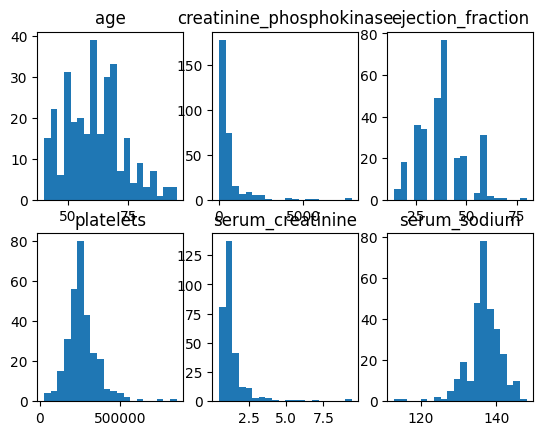

In [ ]:
n_bins = 20
fig, axs = plt.subplots(2,3)
axs[0, 0].hist(dataset_df['age'].values, bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(dataset_df['creatinine_phosphokinase'].values, bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(dataset_df['ejection_fraction'].values, bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(dataset_df['platelets'].values, bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(dataset_df['serum_creatinine'].values, bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(dataset_df['serum_sodium'].values, bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

4. На основании гистограмм определите диапазоны значений для каждого из признаков, а
также возле какого значения лежит наибольшее количество наблюдений.

In [ ]:
data1 = dataset_df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']].agg(['min', 'max'])
print(data1)

      age  creatinine_phosphokinase  ejection_fraction  platelets  \
min  40.0                        23                 14    25100.0   
max  95.0                      7861                 80   850000.0   

     serum_creatinine  serum_sodium  
min               0.5           113  
max               9.4           148  


In [ ]:
data2 = dataset_df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']].mode()
print(data2)

    age  creatinine_phosphokinase  ejection_fraction  platelets  \
0  60.0                       582                 35  263358.03   

   serum_creatinine  serum_sodium  
0               1.0           136  


5. Так как библиотека Sklearn работает с NumPy массива, то преобразуйте датафрейм к
двумерному массиву NumPy, где строка соответствует наблюдению, а столбец признаку

In [ ]:
data = dataset_df.to_numpy(dtype='float')
print(data)

[[7.5000000e+01 5.8200000e+02 2.0000000e+01 2.6500000e+05 1.9000000e+00
  1.3000000e+02]
 [5.5000000e+01 7.8610000e+03 3.8000000e+01 2.6335803e+05 1.1000000e+00
  1.3600000e+02]
 [6.5000000e+01 1.4600000e+02 2.0000000e+01 1.6200000e+05 1.3000000e+00
  1.2900000e+02]
 ...
 [4.5000000e+01 2.0600000e+03 6.0000000e+01 7.4200000e+05 8.0000000e-01
  1.3800000e+02]
 [4.5000000e+01 2.4130000e+03 3.8000000e+01 1.4000000e+05 1.4000000e+00
  1.4000000e+02]
 [5.0000000e+01 1.9600000e+02 4.5000000e+01 3.9500000e+05 1.6000000e+00
  1.3600000e+02]]


# Стандартизация данных

1.Подключите модуль Sklearn. Настройте стандартизацию на основе первых 150 наблюдений
используя StandardScaler

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data[:150,:])

2.Стандартизуйте все данные

In [ ]:
data_scaled = scaler.transform(data)

3.Постройте гистограммы стандартизированных данных

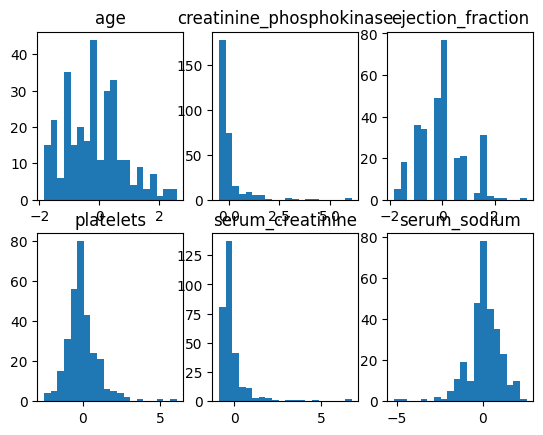

In [ ]:
fig, axs = plt.subplots(2,3)
axs[0, 0].hist(data_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()


4.Сравните данные до и после стандартизации. Опишите, что изменилось и почему.


In [ ]:
df_scaled = pd.DataFrame(data_scaled, columns=dataset_df.columns)

Данные до стандартизации

In [ ]:
print(dataset_df.describe())

              age  creatinine_phosphokinase  ejection_fraction      platelets  \
count  299.000000                299.000000         299.000000     299.000000   
mean    60.833893                581.839465          38.083612  263358.029264   
std     11.894809                970.287881          11.834841   97804.236869   
min     40.000000                 23.000000          14.000000   25100.000000   
25%     51.000000                116.500000          30.000000  212500.000000   
50%     60.000000                250.000000          38.000000  262000.000000   
75%     70.000000                582.000000          45.000000  303500.000000   
max     95.000000               7861.000000          80.000000  850000.000000   

       serum_creatinine  serum_sodium  
count         299.00000    299.000000  
mean            1.39388    136.625418  
std             1.03451      4.412477  
min             0.50000    113.000000  
25%             0.90000    134.000000  
50%             1.10000    137

Данные после стандартизации

In [ ]:
print(df_scaled.describe())

              age  creatinine_phosphokinase  ejection_fraction   platelets  \
count  299.000000                299.000000         299.000000  299.000000   
mean    -0.169704                 -0.021277           0.010502   -0.035229   
std      0.955423                  0.815544           0.907627    1.016763   
min     -1.843138                 -0.490991          -1.836497   -2.512135   
25%     -0.959588                 -0.412403          -0.609439   -0.563944   
50%     -0.236684                 -0.300194           0.004090   -0.049347   
75%      0.566543                 -0.021142           0.540928    0.382083   
max      2.574609                  6.096985           3.225117    6.063441   

       serum_creatinine  serum_sodium  
count        299.000000    299.000000  
mean          -0.108641      0.037908  
std            0.886913      0.972000  
min           -0.874988     -5.166406  
25%           -0.532057     -0.540431  
50%           -0.360592      0.120422  
75%           -0.

Стандартизация приближает среднее значение каждого признака к 0, так как из каждого значения вычитается его среднее. Это приводит к тому, что распределение становится симметричным относительно нуля.

5.Рассчитайте мат. ожидание и СКО до и после стандартизации. На основании этих значений
выведите для каждого признака формулы по которым они стандартизировались.


In [ ]:
mean_before = dataset_df.mean()
std_before = dataset_df.std()

mean_after = np.mean(data_scaled, axis=0)
std_after = np.std(data_scaled, axis=0)

mean_after_series = pd.Series(mean_after, index=dataset_df.columns)
std_after_series = pd.Series(std_after, index=dataset_df.columns)

мат. ожидание и СКО до стандартизации

In [ ]:
print(mean_before)
print(std_before)

age                             60.833893
creatinine_phosphokinase       581.839465
ejection_fraction               38.083612
platelets                   263358.029264
serum_creatinine                 1.393880
serum_sodium                   136.625418
dtype: float64
age                            11.894809
creatinine_phosphokinase      970.287881
ejection_fraction              11.834841
platelets                   97804.236869
serum_creatinine                1.034510
serum_sodium                    4.412477
dtype: float64


мат. ожидание и СКО после стандартизации

In [ ]:
print(mean_after_series)
print(std_after_series)

age                        -0.169704
creatinine_phosphokinase   -0.021277
ejection_fraction           0.010502
platelets                  -0.035229
serum_creatinine           -0.108641
serum_sodium                0.037908
dtype: float64
age                         0.953824
creatinine_phosphokinase    0.814179
ejection_fraction           0.906108
platelets                   1.015061
serum_creatinine            0.885429
serum_sodium                0.970374
dtype: float64


6.Сравните значений из формул с полями mean_ и var_ объекта scaler

In [ ]:
print(scaler.mean_,)
print(scaler.var_)

[6.29466667e+01 6.07153333e+02 3.79466667e+01 2.66746749e+05
 1.52060000e+00 1.36453333e+02]
[1.54997156e+02 1.41548882e+06 1.70023822e+02 9.25286050e+09
 1.36052697e+00 2.06078222e+01]


7.Проведите настройку стандартизации на всех данных и сравните с результатами настройки
на основании 150 наблюдений

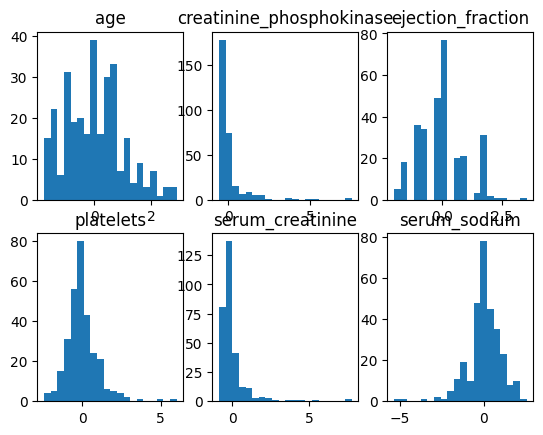

In [ ]:
scaled_all = preprocessing.StandardScaler().fit_transform(data)

mean_after_all = np.mean(scaled_all, axis=0)
var_after_all = np.var(scaled_all, axis=0)

fig, axs = plt.subplots(2,3)
axs[0, 0].hist(scaled_all[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(scaled_all[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(scaled_all[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(scaled_all[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(scaled_all[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(scaled_all[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

Сравнение средних значений

In [ ]:
for i, column in enumerate(dataset_df.columns):
    print(f"{column} \n\t Среднее на всех данных = {mean_after_all[i]:.2f}, \n\t Среднее на первых 150 = {mean_after[i]:.2f}\n")

age 
	 Среднее на всех данных = 0.00, 
	 Среднее на первых 150 = -0.17

creatinine_phosphokinase 
	 Среднее на всех данных = 0.00, 
	 Среднее на первых 150 = -0.02

ejection_fraction 
	 Среднее на всех данных = -0.00, 
	 Среднее на первых 150 = 0.01

platelets 
	 Среднее на всех данных = 0.00, 
	 Среднее на первых 150 = -0.04

serum_creatinine 
	 Среднее на всех данных = 0.00, 
	 Среднее на первых 150 = -0.11

serum_sodium 
	 Среднее на всех данных = -0.00, 
	 Среднее на первых 150 = 0.04



Сравнение дисперсий

In [ ]:
for i, column in enumerate(dataset_df.columns):
    print(f"{column} \n\t Дисперсия на всех данных = {var_after_all[i]:.2f}, \n\t Дисперсия на первых 150 = {scaler.var_[i]:.2f}\n")

age 
	 Дисперсия на всех данных = 1.00, 
	 Дисперсия на первых 150 = 155.00

creatinine_phosphokinase 
	 Дисперсия на всех данных = 1.00, 
	 Дисперсия на первых 150 = 1415488.82

ejection_fraction 
	 Дисперсия на всех данных = 1.00, 
	 Дисперсия на первых 150 = 170.02

platelets 
	 Дисперсия на всех данных = 1.00, 
	 Дисперсия на первых 150 = 9252860499.08

serum_creatinine 
	 Дисперсия на всех данных = 1.00, 
	 Дисперсия на первых 150 = 1.36

serum_sodium 
	 Дисперсия на всех данных = 1.00, 
	 Дисперсия на первых 150 = 20.61



# Приведение к диапазону


1.Приведите данные к диапазону используя MinMaxScaler

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data)
data_min_max_scaled = min_max_scaler.transform(data)


2.Постройте гистограммы для признаков и сравните с исходными данными


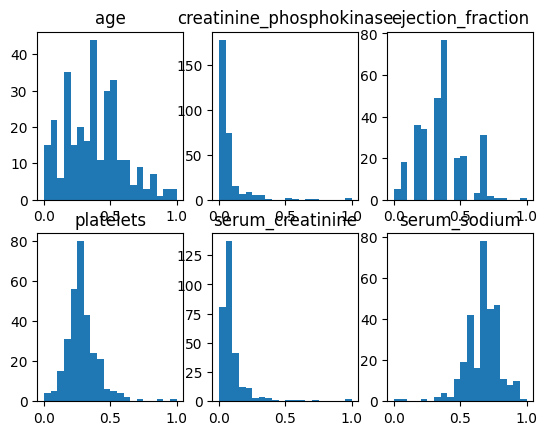

In [ ]:
fig, axs = plt.subplots(2,3)
axs[0, 0].hist(data_min_max_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_min_max_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_min_max_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_min_max_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_min_max_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_min_max_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
data_min_max_df = pd.DataFrame(data_min_max_scaled, columns=columns)

Данные после приведения к диапазону

In [ ]:
print(data_min_max_df.describe())

              age  creatinine_phosphokinase  ejection_fraction   platelets  \
count  299.000000                299.000000         299.000000  299.000000   
mean     0.378798                  0.071299           0.364903    0.288833   
std      0.216269                  0.123793           0.179316    0.118565   
min      0.000000                  0.000000           0.000000    0.000000   
25%      0.200000                  0.011929           0.242424    0.227179   
50%      0.363636                  0.028961           0.363636    0.287186   
75%      0.545455                  0.071319           0.469697    0.337495   
max      1.000000                  1.000000           1.000000    1.000000   

       serum_creatinine  serum_sodium  
count        299.000000    299.000000  
mean           0.100436      0.675012  
std            0.116237      0.126071  
min            0.000000      0.000000  
25%            0.044944      0.600000  
50%            0.067416      0.685714  
75%            0.

Исходные данные


In [ ]:
print(dataset_df.describe())

              age  creatinine_phosphokinase  ejection_fraction      platelets  \
count  299.000000                299.000000         299.000000     299.000000   
mean    60.833893                581.839465          38.083612  263358.029264   
std     11.894809                970.287881          11.834841   97804.236869   
min     40.000000                 23.000000          14.000000   25100.000000   
25%     51.000000                116.500000          30.000000  212500.000000   
50%     60.000000                250.000000          38.000000  262000.000000   
75%     70.000000                582.000000          45.000000  303500.000000   
max     95.000000               7861.000000          80.000000  850000.000000   

       serum_creatinine  serum_sodium  
count         299.00000    299.000000  
mean            1.39388    136.625418  
std             1.03451      4.412477  
min             0.50000    113.000000  
25%             0.90000    134.000000  
50%             1.10000    137

3.Через параметры MinMaxScaler определите минимальное и максимальное значение в
данных для каждого признака


In [ ]:
print(min_max_scaler.data_min_)

[4.00e+01 2.30e+01 1.40e+01 2.51e+04 5.00e-01 1.13e+02]


In [ ]:
print(min_max_scaler.data_max_)

[9.500e+01 7.861e+03 8.000e+01 8.500e+05 9.400e+00 1.480e+02]


4.Аналогично трансформируйте данные используя MaxAbsScaler и RobustScaler. Постройте
гистограммы. Определите к какому диапазону приводятся данные.


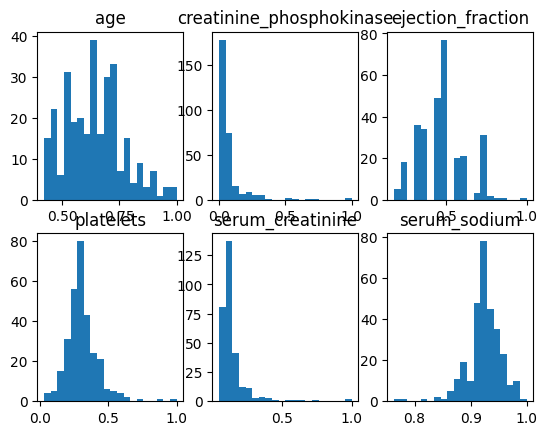

In [ ]:
max_abs_scaler = preprocessing.MaxAbsScaler().fit_transform(data)

fig, axs = plt.subplots(2,3)
axs[0, 0].hist(max_abs_scaler[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(max_abs_scaler[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(max_abs_scaler[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(max_abs_scaler[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(max_abs_scaler[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(max_abs_scaler[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

max_abs_scaler_df = pd.DataFrame(max_abs_scaler, columns=dataset_df.columns)
max_abs_min = max_abs_scaler_df.min()
max_abs_max = max_abs_scaler_df.max()

Диапазон значений после MaxAbsScaler

In [ ]:
print(max_abs_min)
print(max_abs_max)

age                         0.421053
creatinine_phosphokinase    0.002926
ejection_fraction           0.175000
platelets                   0.029529
serum_creatinine            0.053191
serum_sodium                0.763514
dtype: float64
age                         1.0
creatinine_phosphokinase    1.0
ejection_fraction           1.0
platelets                   1.0
serum_creatinine            1.0
serum_sodium                1.0
dtype: float64


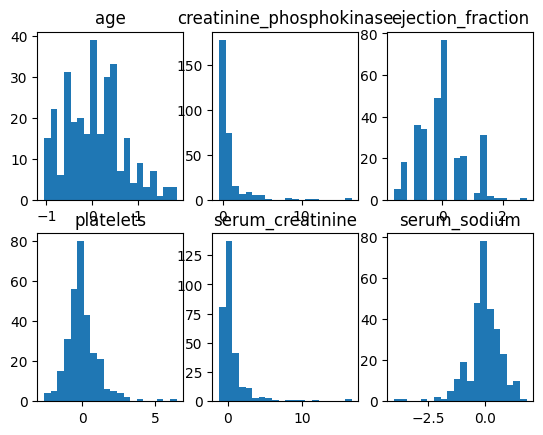

In [ ]:
robust_scaler = preprocessing.RobustScaler().fit(data)
data_robust_scaler = robust_scaler.transform(data)

fig, axs = plt.subplots(2,3)
axs[0, 0].hist(data_robust_scaler[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_robust_scaler[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_robust_scaler[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_robust_scaler[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_robust_scaler[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_robust_scaler[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

data_robust_scaler_df = pd.DataFrame(data_robust_scaler, columns=dataset_df.columns)
robust_min = data_robust_scaler_df.min()
robust_max = data_robust_scaler_df.max()

Диапазон значений после RobustScaler

In [ ]:
print(robust_min)
print(robust_max)

age                        -1.052632
creatinine_phosphokinase   -0.487648
ejection_fraction          -1.600000
platelets                  -2.603297
serum_creatinine           -1.200000
serum_sodium               -4.000000
dtype: float64
age                          1.842105
creatinine_phosphokinase    16.350161
ejection_fraction            2.800000
platelets                    6.461538
serum_creatinine            16.600000
serum_sodium                 1.833333
dtype: float64


5.Напишите функцию, которая приводит все данные к диапазону [-5 10]

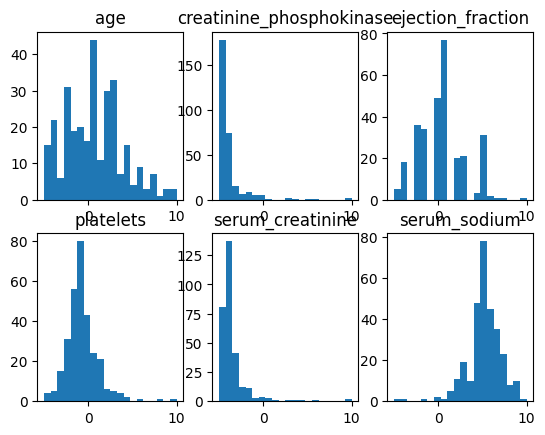

                                           Признак  Минимум до  Максимум до  \
age                                            age        40.0         95.0   
creatinine_phosphokinase  creatinine_phosphokinase        23.0       7861.0   
ejection_fraction                ejection_fraction        14.0         80.0   
platelets                                platelets     25100.0     850000.0   
serum_creatinine                  serum_creatinine         0.5          9.4   
serum_sodium                          serum_sodium       113.0        148.0   

                          Минимум после  Максимум после  
age                                -5.0            10.0  
creatinine_phosphokinase           -5.0            10.0  
ejection_fraction                  -5.0            10.0  
platelets                          -5.0            10.0  
serum_creatinine                   -5.0            10.0  
serum_sodium                       -5.0            10.0  


In [ ]:
data_range_scaler = preprocessing.MinMaxScaler(feature_range=(-5, 10))
data_range = data_range_scaler.fit_transform(data)

fig, axs = plt.subplots(2,3)
axs[0, 0].hist(data_range[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_range[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_range[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_range[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_range[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_range[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

Минимальные и максимальные значения исходных данных

In [ ]:
min_values_st = dataset_df.min()
max_values_st = dataset_df.max()

Минимальные и максимальные значения после масштабирования

In [ ]:
min_values_new = data_range.min(axis=0)
max_values_new = data_range.max(axis=0)

Вывод минимальных и максимальных значений до и после

In [ ]:
min_max_new_df = pd.DataFrame({
    'Признак': dataset_df.columns,
    'Минимум до': min_values_st,
    'Максимум до': max_values_st,
    'Минимум после': min_values_new,
    'Максимум после': max_values_new
})
print(min_max_new_df)

                                           Признак  Минимум до  Максимум до  \
age                                            age        40.0         95.0   
creatinine_phosphokinase  creatinine_phosphokinase        23.0       7861.0   
ejection_fraction                ejection_fraction        14.0         80.0   
platelets                                platelets     25100.0     850000.0   
serum_creatinine                  serum_creatinine         0.5          9.4   
serum_sodium                          serum_sodium       113.0        148.0   

                          Минимум после  Максимум после  
age                                -5.0            10.0  
creatinine_phosphokinase           -5.0            10.0  
ejection_fraction                  -5.0            10.0  
platelets                          -5.0            10.0  
serum_creatinine                   -5.0            10.0  
serum_sodium                       -5.0            10.0  


# Нелинейные преобразования


1.Приведите данные к равномерному распределению используя QuantileTransformer

In [ ]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles = 100, random_state=0).fit(data)
data_quantile_scaled = quantile_transformer.transform(data)

2.Постройте гистограммы и сравните с исходными данными

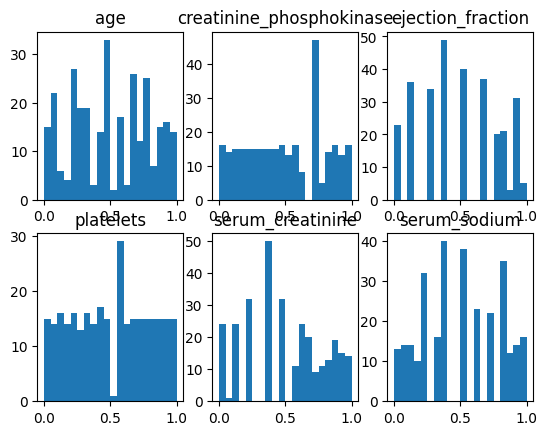

In [ ]:
fig, axs = plt.subplots(2,3)
axs[0, 0].hist(data_quantile_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_quantile_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_quantile_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_quantile_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_quantile_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_quantile_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
data_quantile = pd.DataFrame(data_quantile_scaled, columns=columns)


Данные после приведения к равномерному распределению

In [ ]:
print(data_quantile.describe())

              age  creatinine_phosphokinase  ejection_fraction   platelets  \
count  299.000000                299.000000         299.000000  299.000000   
mean     0.499625                  0.499708           0.500313    0.500526   
std      0.290748                  0.289436           0.289038    0.290216   
min      0.000000                  0.000000           0.000000    0.000000   
25%      0.252525                  0.247083           0.252525    0.249414   
50%      0.484848                  0.499983           0.545455    0.499606   
75%      0.782828                  0.707071           0.767677    0.751256   
max      1.000000                  1.000000           1.000000    1.000000   

       serum_creatinine  serum_sodium  
count        299.000000    299.000000  
mean           0.499822      0.499744  
std            0.289231      0.289786  
min            0.000000      0.000000  
25%            0.217172      0.222222  
50%            0.489899      0.530303  
75%            0.

Исходные данные

In [ ]:
print(dataset_df.describe())

              age  creatinine_phosphokinase  ejection_fraction      platelets  \
count  299.000000                299.000000         299.000000     299.000000   
mean    60.833893                581.839465          38.083612  263358.029264   
std     11.894809                970.287881          11.834841   97804.236869   
min     40.000000                 23.000000          14.000000   25100.000000   
25%     51.000000                116.500000          30.000000  212500.000000   
50%     60.000000                250.000000          38.000000  262000.000000   
75%     70.000000                582.000000          45.000000  303500.000000   
max     95.000000               7861.000000          80.000000  850000.000000   

       serum_creatinine  serum_sodium  
count         299.00000    299.000000  
mean            1.39388    136.625418  
std             1.03451      4.412477  
min             0.50000    113.000000  
25%             0.90000    134.000000  
50%             1.10000    137

3.Определите, как и на что влияет значение параметра n_quantiles

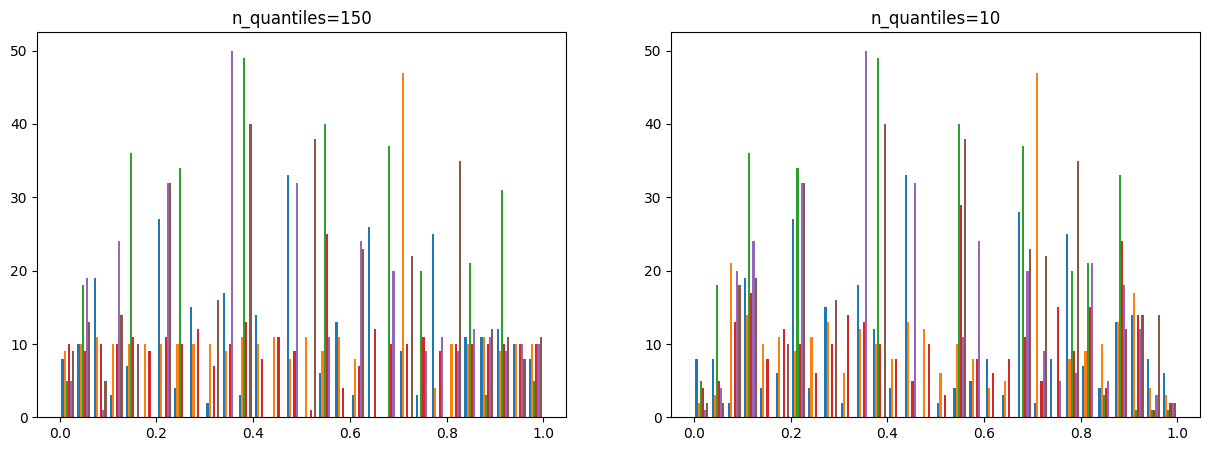

In [ ]:
quantile_transformer_150 = preprocessing.QuantileTransformer(n_quantiles = 150, random_state=0).fit_transform(data)
quantile_transformer_10 = preprocessing.QuantileTransformer(n_quantiles = 10, random_state=0).fit_transform(data)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].hist(quantile_transformer_150, bins=30)
axs[0].set_title('n_quantiles=150')

_data

С увеличением данного параметра графики становятся более гладкими, распределение данных приближается к равномерному

4.Приведите данные к нормальному распределению передав в QuantileTransformer параметр
output_distribution=‘normal’

In [ ]:
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
data_normalized = quantile_transformer.fit_transform(data)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (299). n_quantiles is set to n_samples.
  warnings.warn(


5.Постройте гистограммы и сравните с исходными данными

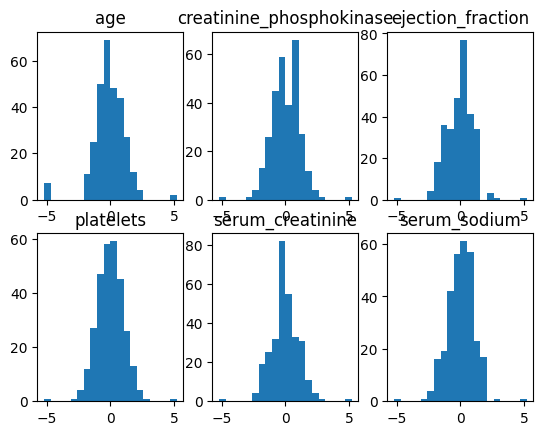

In [ ]:
fig, axs = plt.subplots(2,3)
axs[0, 0].hist(data_normalized[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_normalized[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_normalized[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_normalized[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_normalized[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_normalized[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
df_data_normalized = pd.DataFrame(data_normalized, columns=columns)
df_data = pd.DataFrame(data, columns=columns)
pd.set_option('display.float_format', '{:.6f}'.format)

Данные после нормального распределения

In [ ]:
print(df_data_normalized.describe())

             age  creatinine_phosphokinase  ejection_fraction  platelets  \
count 299.000000                299.000000         299.000000 299.000000   
mean   -0.048911                 -0.000720          -0.001518   0.000078   
std     1.280513                  1.068152           1.046970   1.070197   
min    -5.199338                 -5.199338          -5.199338  -5.199338   
25%    -0.663967                 -0.682491          -0.663967  -0.674499   
50%    -0.033652                  0.004206           0.105338  -0.004206   
75%     0.789996                  0.547708           0.722807   0.677153   
max     5.199338                  5.199338           5.199338   5.199338   

       serum_creatinine  serum_sodium  
count        299.000000    299.000000  
mean           0.005793     -0.002347  
std            1.059804      1.060359  
min           -5.199338     -5.199338  
25%           -0.778555     -0.761583  
50%           -0.021030      0.071559  
75%            0.663967      0.8488

Исходные данные

In [ ]:
print(df_data.describe())

             age  creatinine_phosphokinase  ejection_fraction     platelets  \
count 299.000000                299.000000         299.000000    299.000000   
mean   60.833893                581.839465          38.083612 263358.029264   
std    11.894809                970.287881          11.834841  97804.236869   
min    40.000000                 23.000000          14.000000  25100.000000   
25%    51.000000                116.500000          30.000000 212500.000000   
50%    60.000000                250.000000          38.000000 262000.000000   
75%    70.000000                582.000000          45.000000 303500.000000   
max    95.000000               7861.000000          80.000000 850000.000000   

       serum_creatinine  serum_sodium  
count        299.000000    299.000000  
mean           1.393880    136.625418  
std            1.034510      4.412477  
min            0.500000    113.000000  
25%            0.900000    134.000000  
50%            1.100000    137.000000  
75%     

До распределения признаки имеют различные диапазоны значений. Некоторые признаки имеют сильные выбросы.
После распредления значения всех признаков стали распределены в виде нормального (Гауссового) распределения. Среднее значения всех признаков стремится к нулю, а стандартное отклонение приблизилось к единице

6.Самостоятельно приведите данные к нормальному распределению используя
PowerTransformer

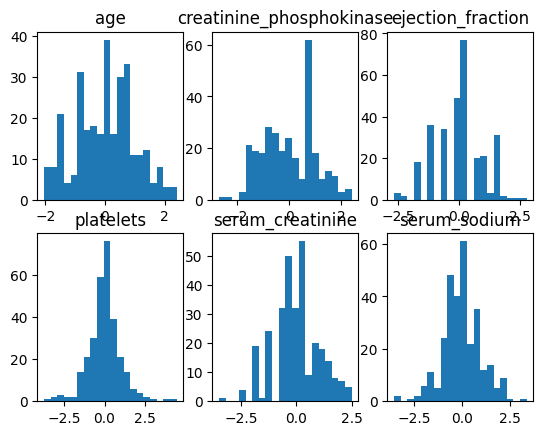

In [ ]:
power_transformer = preprocessing.PowerTransformer(method='box-cox')
data_power_transformed = power_transformer.fit_transform(data)

fig, axs = plt.subplots(2,3)
axs[0, 0].hist(data_power_transformed[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_power_transformed[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_power_transformed[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_power_transformed[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_power_transformed[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_power_transformed[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
df_power_transformed = pd.DataFrame(data_power_transformed, columns=columns)
pd.set_option('display.float_format', '{:.6f}'.format)

Данные после нормального распределения

In [ ]:
print(df_power_transformed.describe())

             age  creatinine_phosphokinase  ejection_fraction  platelets  \
count 299.000000                299.000000         299.000000 299.000000   
mean    0.000000                 -0.000000          -0.000000   0.000000   
std     1.001676                  1.001676           1.001676   1.001676   
min    -2.043918                 -2.700345          -2.666866  -3.733933   
25%    -0.809186                 -0.782214          -0.632523  -0.465566   
50%     0.022803                 -0.036219           0.100800   0.079268   
75%     0.816436                  0.690684           0.658720   0.496729   
max     2.401659                  2.406132           2.788177   4.441169   

       serum_creatinine  serum_sodium  
count        299.000000    299.000000  
mean          -0.000000      0.000000  
std            1.001676      1.001676  
min           -3.489573     -3.534873  
25%           -0.696530     -0.689321  
50%           -0.059056     -0.006500  
75%            0.557014      0.7716

# Дискретизация признаков

1.Проведите дискретизацию признаков, используя KBinsDiscretizer, на следующее
количество диапазонов:


1.   age - 3
2.   creatinine_phosphokinase - 4
3.   ejection_fraction - 3
4.   platelets - 10
5.   serum_creatinine - 2
6.   serum_sodium - 4






In [ ]:
n_bins = [3, 4, 3, 10, 2, 4]

kbins = preprocessing.KBinsDiscretizer(n_bins=n_bins, encode='ordinal')

dataset = kbins.fit_transform(data)

NameError: name 'preprocessing' is not defined

NameError: name 'dataset' is not defined

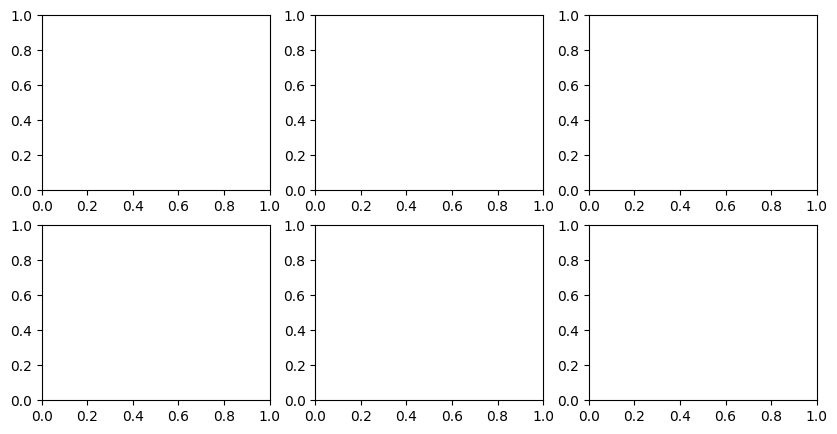